<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/compare_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparar classificadors de discriminants lineals 

In [22]:
from sklearn.datasets import make_blobs,make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

# 1. Load data
n_samples = 1500
centers = [(0, 0), (3, 3)]
#X, y = make_moons(n_samples=n_samples,noise=0.3)
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0,cluster_std=(0.5,5))

# 2. split the data with 80% in each set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,train_size=0.8)

# 3. Fit models:

# K-NEarest Neighbours: 
knn = KNeighborsClassifier(n_neighbors=3)
y_pred_KNN = knn.fit(Xtrain,ytrain).predict(Xtest)

# Gaussian Naive Bayes (GNB):
gnb = GaussianNB()
y_pred_GNB = gnb.fit(Xtrain,ytrain).predict(Xtest)

# Linear Discrimiant Analysis (LDA):
lda = LinearDiscriminantAnalysis(priors=None)
y_pred_LDA = lda.fit(Xtrain,ytrain).predict(Xtest)

# Quadratic Discrimiant Analysis (LDA):
qda = QuadraticDiscriminantAnalysis(priors=None)
y_pred_QDA = qda.fit(Xtrain,ytrain).predict(Xtest)

# 4. Evaluate performances:
cm_KNN = confusion_matrix(ytest, y_pred_KNN)
cm_GNB = confusion_matrix(ytest, y_pred_GNB)
cm_LDA = confusion_matrix(ytest, y_pred_LDA)
cm_QDA = confusion_matrix(ytest, y_pred_QDA)

print('KNN {} \n'.format(cm_KNN))
print('GNB {} \n'.format(cm_GNB))
print('LDA {} \n'.format(cm_LDA))
print('QDA {} \n'.format(cm_QDA))

KNN [[139   0]
 [  3 158]] 

GNB [[137   2]
 [  3 158]] 

LDA [[139   0]
 [ 58 103]] 

QDA [[137   2]
 [  3 158]] 



Representem les prediccions del subconjunt de test de cada model 

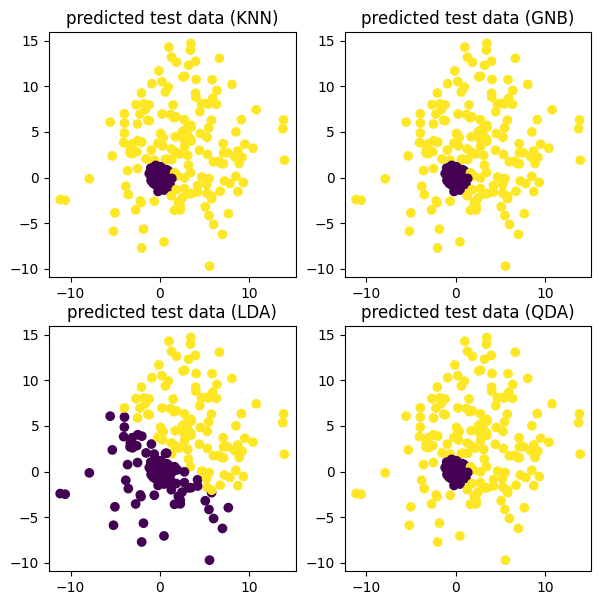

In [23]:
plt.figure(figsize=(7,7))
plt.subplot(221)
plt.scatter(Xtest[:, 0], Xtest[:, 1],c=y_pred_KNN)
plt.title("predicted test data (KNN)")

plt.subplot(222)
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=y_pred_GNB)
plt.title("predicted test data (GNB)")

plt.subplot(223)
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=y_pred_LDA)
plt.title("predicted test data (LDA)")

plt.subplot(224)
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=y_pred_QDA)
plt.title("predicted test data (QDA)")
plt.show()